In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Walmart_Store_sales.csv')
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
data['Date']=pd.to_datetime(data['Date'])
data['Day']=data['Date'].dt.day

# Which store has maximum sales

In [5]:
df=data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
df

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

Text(0.5, 1.0, 'Total Sales in stores')

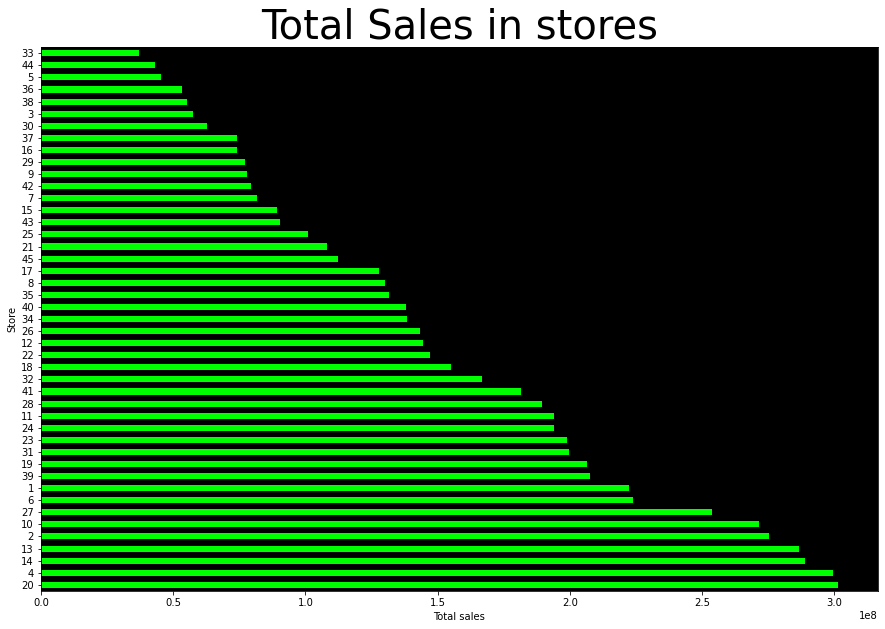

In [6]:
plt.figure(figsize=(15,10))
df.plot(kind='barh',color='lime').set_facecolor('black')
plt.xlabel('Total sales')
plt.title('Total Sales in stores',size=40)

### MAXIMUM SALES=IN STORE 20
MINIMUM SALLES=IN STORE 33

# Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [7]:
sd=pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))

sd.head(1).index[0],sd.head(1).Weekly_Sales[sd.head(1).index[0]]

(14, 317569.9494755081)

### store which has maximum standard deviation is = 14th Store.

In [8]:
s=data[data['Store']==sd.head(1).index[0]]['Weekly_Sales']

Text(0.5, 1.0, 'Sales distribution of store 14th')

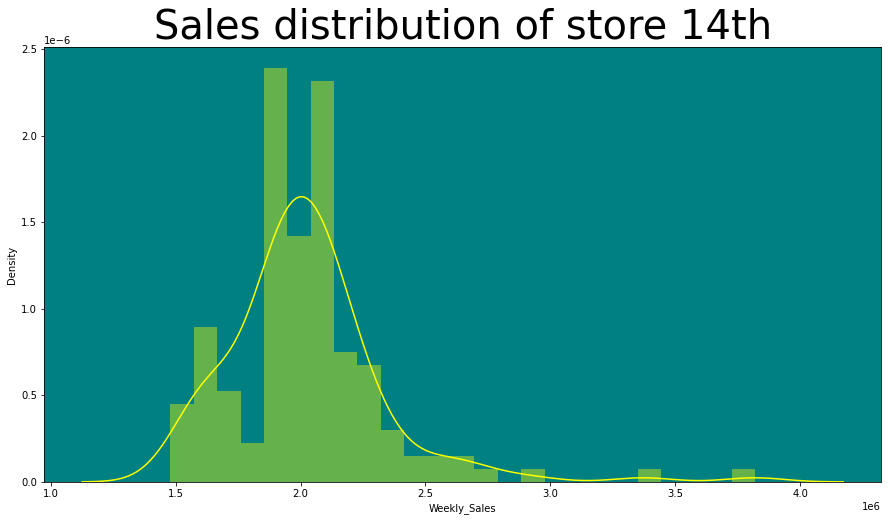

In [9]:
plt.figure(figsize=(15,8))
sns.distplot(s, color='yellow').set_facecolor('teal')
plt.title('Sales distribution of store 14th', size=40)

# Find out the coefficient of mean to standard deviation

In [10]:
c=pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std()/data.groupby('Store')['Weekly_Sales'].mean())

c=c.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef=c.sort_values(by='Coefficient of mean to standard deviation',ascending=False)
coef

,Coefficient of mean to standard deviation
Store,
35,0.229681
7,0.197305
15,0.193384
29,0.183742
23,0.179721
21,0.170292
45,0.165613
16,0.165181
18,0.162845


### Store which has maximum coefficient of meanto standard deviation is= store number 35

Text(0.5, 1.0, 'Sales Distribution of Store number : 35')

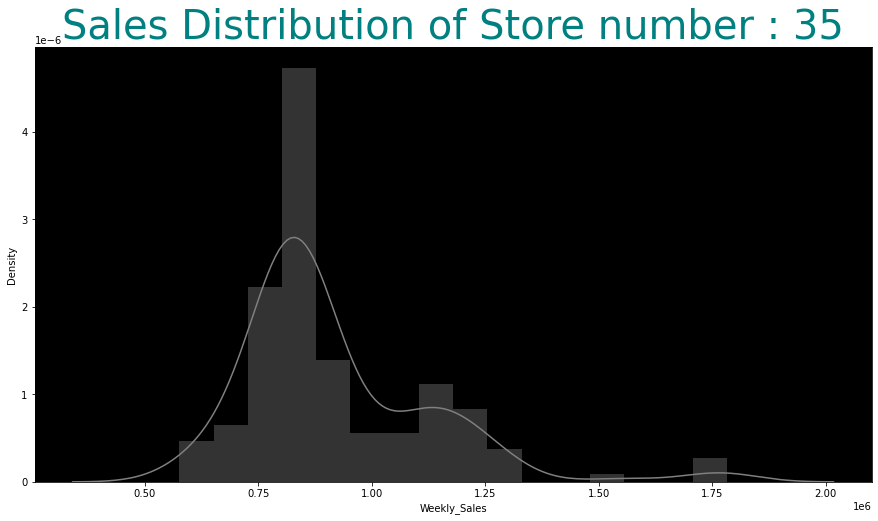

In [11]:
p=data[data['Store']==coef.head(1).index[0]]['Weekly_Sales']
plt.figure(figsize=(15,8))
sns.distplot(p,color='grey').set_facecolor('black')
plt.title('Sales Distribution of Store number : '+str(coef.head(1).index[0]), size=40,color='teal')

# Which store/s has good quarterly growth rate in Q3’2012

In [12]:
qg=pd.DataFrame(data['Date'].dt.year)
qg['month']=data["Date"].dt.month
qg=qg.rename(columns={'Date': "year"})
qg['Weekly_Sales']=data['Weekly_Sales']
qg['Store']=data['Store']

In [13]:
q2=qg[(qg['year']==2012) & (qg['month']>=4) & (qg['month']<=6)].groupby('Store')['Weekly_Sales'].sum()
q3=qg[(qg['year']==2012) & (qg['month']>=7) & (qg['month']<=9)].groupby('Store')['Weekly_Sales'].sum()

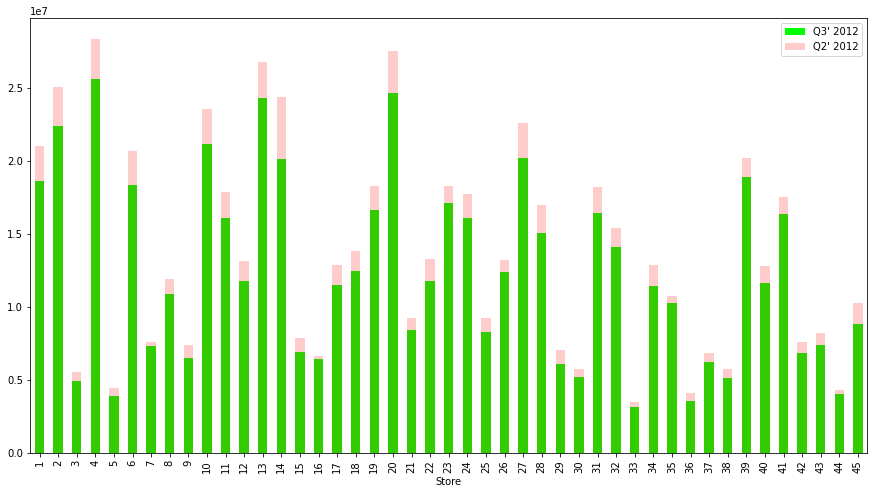

In [14]:
plt.figure(figsize=(15,8))
q2.plot(ax=q3.plot(kind ='bar',color='lime'),kind='bar',color='red',alpha=0.2,legend=True)
plt.legend(["Q3' 2012", "Q2' 2012"])

#### store which has good quarterly sales in Q3’2012 is store no. 4.

In [15]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19


In [16]:
q2_sales=data[(data['Date']>='2012-04-01') & (data['Date']<='2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
q3_sales=data[(data['Date']>='2012-07-01') & (data['Date']<='2012-09-30')].groupby('Store')['Weekly_Sales'].sum()
qg_rate=((q3_sales-q2_sales)/q2_sales)*100
qg_rate  =qg_rate.sort_values(ascending=False)

Text(0.5, 1.0, 'Quarterly Growth Rate')

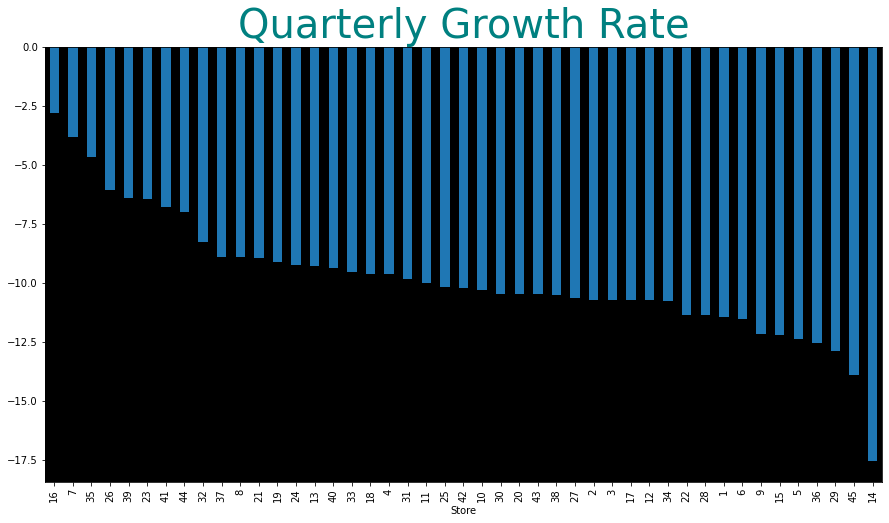

In [17]:
plt.figure( figsize= (15,8))
qg_rate.plot( kind='bar').set_facecolor('black')
plt.title('Quarterly Growth Rate', size=40, color='teal')

### there is no store which has performed better in the 3rd quarter as compared to the 2nd quarter.

# Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together



In [18]:
Super_Bowl=[ '12-02-10', '11-02-11', '10-02-12', '8-02-13']
Labour_Day=['10-09-10','9-09-11','7-09-12','6-09-13']
Thanksgiving=['26-11-10', '25-11-11', '23-11-12', '29-11-13']
Christmas=['31-12-10', '30-12-11', '28-12-12', '27-12-13']

In [19]:
sb_sales=pd.DataFrame(data.loc[data.Date.isin(Super_Bowl)])['Weekly_Sales'].mean()
ld_sales=pd.DataFrame(data.loc[data.Date.isin(Labour_Day)])['Weekly_Sales'].mean()
tg_sales=pd.DataFrame(data.loc[data.Date.isin(Thanksgiving)])['Weekly_Sales'].mean()
chst_sales=pd.DataFrame(data.loc[data.Date.isin(Christmas)])['Weekly_Sales'].mean()

In [20]:
sb_sales,ld_sales,tg_sales,chst_sales

(1079127.9877037033, 1042427.2939259257, 1471273.427777778, 960833.1115555551)

In [21]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19


In [22]:
n_hday=data[data['Holiday_Flag']==0]['Weekly_Sales'].mean()
n_hday

1041256.3802088564

In [23]:
mean_sales={'Super_Bowl':sb_sales,'Labour_Day':ld_sales,'Thanksgiving':tg_sales,'Christmas':chst_sales,'Non_holiday':n_hday}
mean_sales

{'Super_Bowl': 1079127.9877037033,
 'Labour_Day': 1042427.2939259257,
 'Thanksgiving': 1471273.427777778,
 'Christmas': 960833.1115555551,
 'Non_holiday': 1041256.3802088564}

### Thanksgiving has higher sales than the mean sales on non-holidays.

# Provide a monthly and semester view of sales in units and give insights

In [24]:
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month

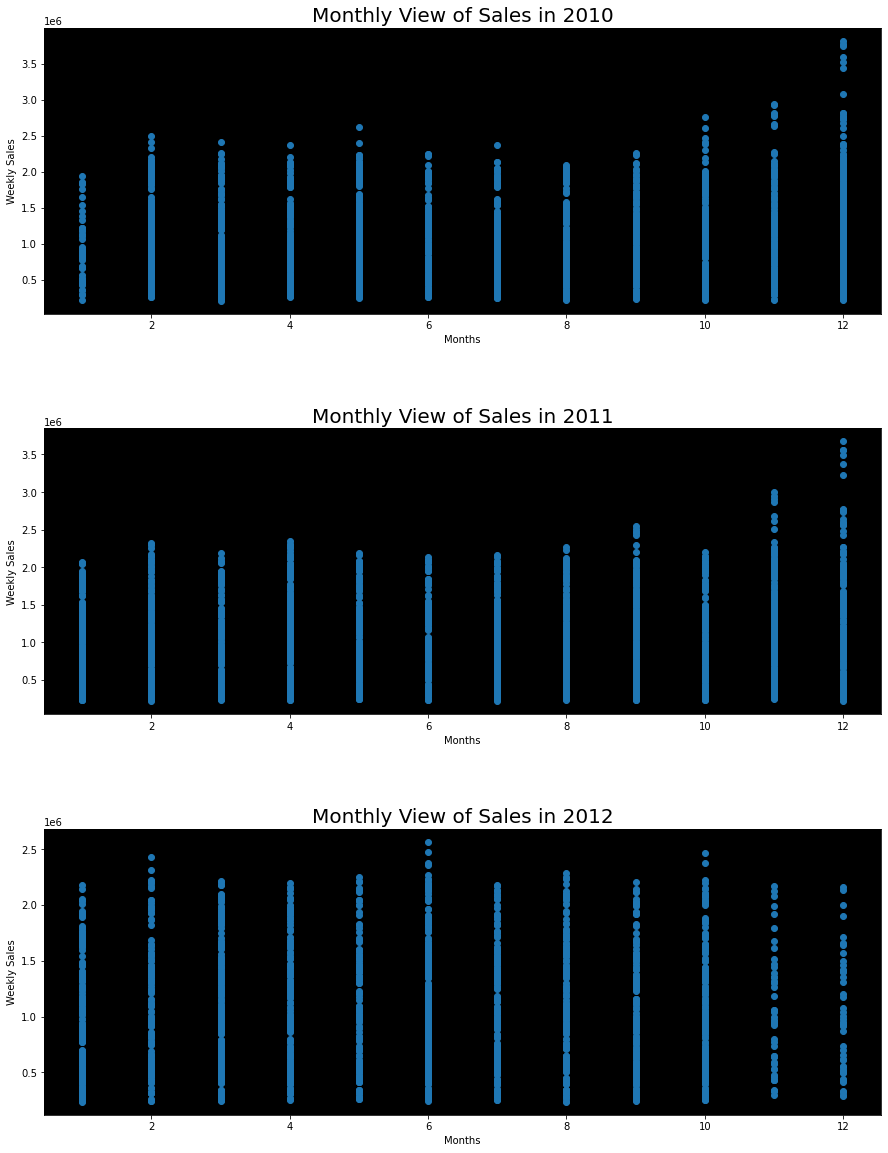

In [25]:
plt.figure(figsize=(15,20))
for i in range(3):
    plt.subplot(3,1,(i+1)).set_facecolor('Black')
    plt.xlabel('Months')
    plt.scatter(data[data['Year']==(2010+i)]['Month'], data[data['Year']==(2010+i)]['Weekly_Sales'])
    plt.ylabel('Weekly Sales')
    plt.title('Monthly View of Sales in '+str((2010+i)), size=20)
    plt.subplots_adjust(hspace=0.4)
    

## Overall Monthly Sales

Text(0.5, 1.0, 'Overall monthly Sales')

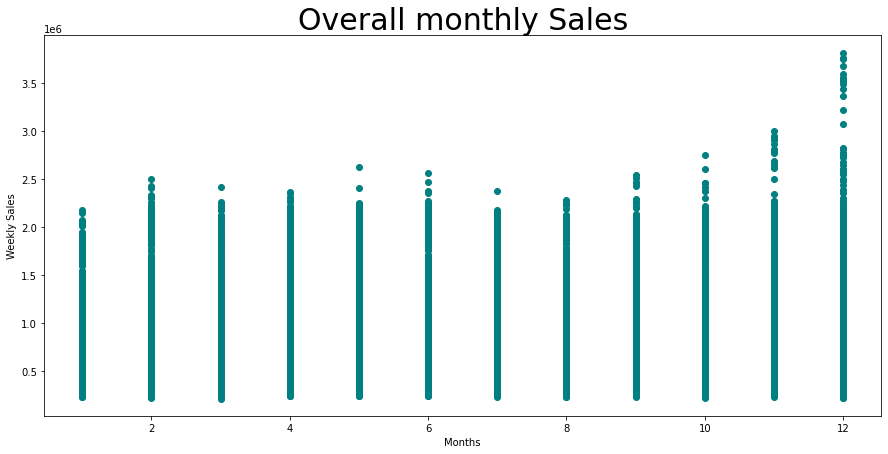

In [26]:
plt.figure(figsize=(15,7))
plt.scatter(data['Month'], data['Weekly_Sales'],color='teal')
plt.xlabel('Months')
plt.ylabel('Weekly Sales')
plt.title('Overall monthly Sales', size=30)

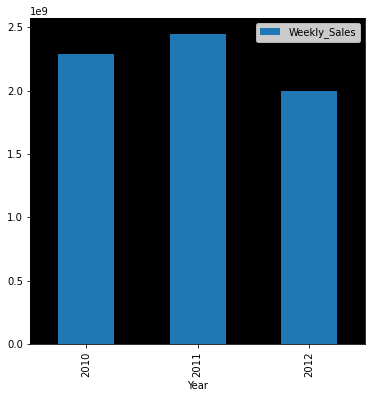

In [27]:

data.groupby('Year')[['Weekly_Sales']].sum().plot(kind='bar', figsize=(6,6)).set_facecolor('Black')

### Overall monthly sales are higher in the month of December while the yearly sales in the year 2011 are the highest.

## For Store 1 – Build prediction models to forecast demand : Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales. Change dates into days by creating new variable. Select the model which gives best accuracy.

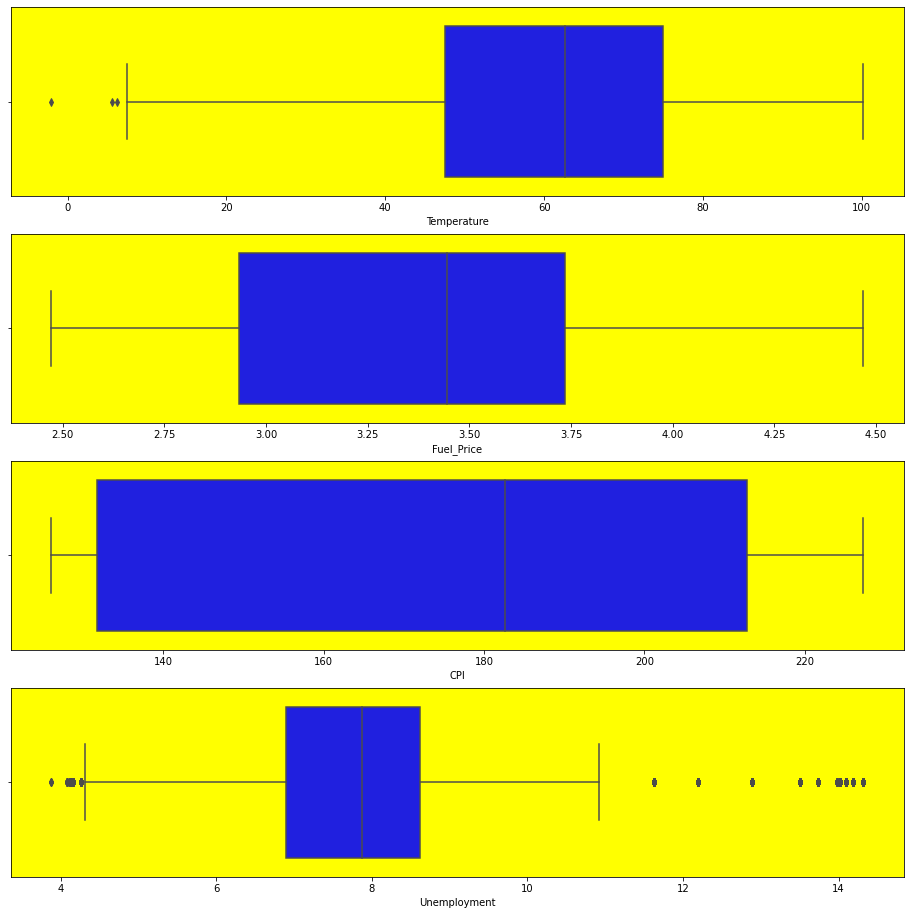

In [28]:
fig,axis= plt.subplots(4, figsize=(16,16))
x=data[['Temperature','Fuel_Price','CPI','Unemployment']]
 
for i,column in enumerate(x):
    sns.boxplot(data[column], ax=axis[i], color='blue').set_facecolor('yellow')

In [29]:
df=data[(data['Unemployment']<10)&(data['Unemployment']>4.5) & (data['Temperature']>10)]
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Year,Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,5
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,2012,9
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,5
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,2012,10


# Dropping outliers   

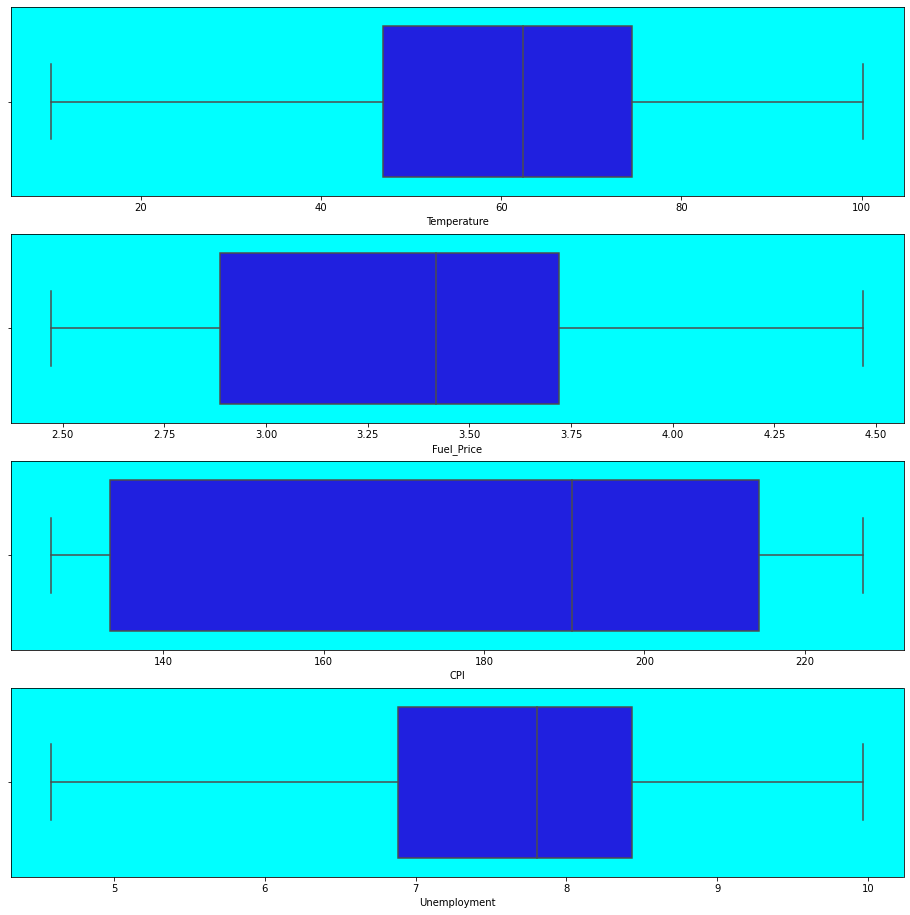

In [30]:
fig,axis=plt.subplots(4, figsize=(16,16))
x=df[['Temperature','Fuel_Price','CPI','Unemployment']]

for i,column in enumerate(x):
    sns.boxplot(df[column], ax=axis[i],color='blue').set_facecolor('aqua')

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
X = df[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
Y = df['Weekly_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

Linear Regression:

Accuracy: 13.210736384748145
Mean Absolute Error: 441349.175976728
Mean Squared Error: 283209153997.3937
Root Mean Squared Error: 532173.9884637295


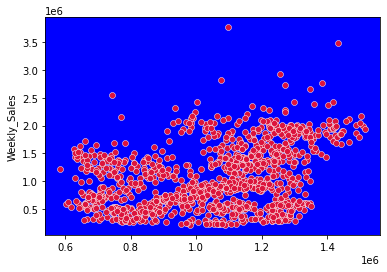

In [32]:
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, Y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(Y_pred, Y_test, color='crimson').set_facecolor('blue')


Random Forest Regressor:

Accuracy: 94.7483823537714
Mean Absolute Error: 66894.89630530034
Mean Squared Error: 16820407144.06221
Root Mean Squared Error: 129693.51234376455


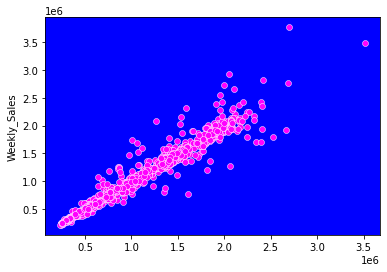

In [33]:
from sklearn.ensemble import RandomForestRegressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor()        
rfr.fit(X_train,Y_train)
Y_pred = rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, Y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(Y_pred, Y_test, color='magenta').set_facecolor('blue')


## Linear Regression is not an appropriate model to use which is clear from it's low accuracy. However, Random Forest Regression gives accuracy of over 95% , so, it is the best model to forecast demand.